In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key

In [2]:
lats = np.random.uniform(-90,90,1500)
longs = np.random.uniform(-180,180,1500)
lat_lngs = zip(lats,longs)

In [3]:
coordinates = list(lat_lngs)

In [4]:
cities = []
for coordinate in coordinates:
    # find nearest city
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # if city is unique, add to list of cities
    if city not in cities:
        cities.append(city)
print(len(cities))

603


In [5]:
import requests
from datetime import datetime

In [6]:
# Define base url
url = 'http://api.openweathermap.org/data/2.5/weather?q='
# Create empty list to hold the weather data
city_data = []

# Print the beginning of logging
print("Beginning Data Retreival         ")
print("---------------------------------")

# Create counters for cities and log sets
record_count = 1
set_count = 1
cities_found = 0
cities_not_found = 0

# Loop through all the cities in our list
for i in range(0,len(cities)):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city = cities[i]
    city_url = url + city.replace(" ","+") + '&units=Imperial&APPID=' + weather_api_key

    # Log the URL, record, and set numbers, and the city
#     print(f'Processing Record {record_count} of Set {set_count}: {cities[i]}')

    record_count += 1

    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_long = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({'City': city.title(),
                            'Lat': city_lat,
                            'Long': city_long,
                            'Max Temp': city_max_temp,
                            'Humidity': city_humidity,
                            'Cloudiness': city_clouds,
                            'Wind Speed': city_wind,
                            'Country': city_country,
                            'Date': city_date})
        cities_found += 1
    except:
#         print('City not found. Skipping...')
        cities_not_found += 1
        continue
print(cities_found, cities_not_found)
# city = cities[i]
# city_url = url + '&q=' + city.replace(" ","+")
# r = requests.get(city_url)
# print(r)


Beginning Data Retreival         
---------------------------------
553 50


In [7]:
len(city_data)

553

In [8]:
city_data[1]

{'City': 'Punta Arenas',
 'Lat': -53.15,
 'Long': -70.9167,
 'Max Temp': 41,
 'Humidity': 87,
 'Cloudiness': 75,
 'Wind Speed': 16.11,
 'Country': 'CL',
 'Date': '2021-01-27 12:49:57'}

In [9]:
city_weather_df = pd.DataFrame(city_data)

In [10]:
city_weather_df.head(10)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Goderich,43.7501,-81.7165,24.80,86,100,12.66,CA,2021-01-27 12:46:32
1,Punta Arenas,-53.1500,-70.9167,41.00,87,75,16.11,CL,2021-01-27 12:49:57
2,Chuy,-33.6971,-53.4616,78.91,67,24,5.35,UY,2021-01-27 12:50:42
3,Kargil,34.5667,76.1000,-4.68,74,41,2.37,IN,2021-01-27 12:50:42
4,Kuytun,54.3419,101.5036,-16.40,86,100,9.62,RU,2021-01-27 12:50:42
5,Hithadhoo,-0.6000,73.0833,82.02,75,100,11.27,MV,2021-01-27 12:50:43
6,Biga,40.2281,27.2422,33.60,94,100,15.39,TR,2021-01-27 12:50:26
7,Calatayud,41.3535,-1.6432,69.80,43,0,8.05,ES,2021-01-27 12:50:44
8,Iskateley,67.6803,53.1512,-8.64,86,100,14.29,RU,2021-01-27 12:50:44
9,Vaini,-21.2000,-175.2000,77.00,94,90,6.91,TO,2021-01-27 12:50:44


In [11]:
column_order = ['City','Country','Date','Lat','Long','Max Temp','Humidity','Cloudiness','Wind Speed']
city_weather_df = city_weather_df[column_order]
city_weather_df.tail(10)

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
543,Kitahiroshima,JP,2021-01-27 12:52:57,42.9758,141.5672,28.40,64,75,13.80
544,Rio Gallegos,AR,2021-01-27 12:52:57,-51.6226,-69.2181,48.20,49,75,19.57
545,Grand-Lahou,CI,2021-01-27 12:52:58,5.1367,-5.0242,83.57,71,100,7.18
546,Abu Kamal,SY,2021-01-27 12:52:58,34.4506,40.9171,63.07,28,100,16.87
547,Warrington,GB,2021-01-27 12:48:25,53.3925,-2.5802,50.00,93,40,3.44
548,Bagdarin,RU,2021-01-27 12:52:58,54.4333,113.6000,-21.24,79,69,4.52
549,Mpika,ZM,2021-01-27 12:52:59,-11.8343,31.4529,75.49,72,38,4.41
550,Balsta,SE,2021-01-27 12:52:59,59.5671,17.5278,24.80,93,90,6.91
551,Colombia,CU,2021-01-27 12:52:59,20.9881,-77.4297,68.00,100,20,5.75
552,Sao Paulo De Olivenca,BR,2021-01-27 12:53:00,-3.3783,-68.8725,76.41,90,100,1.05


In [12]:
city_weather_df.loc[city_weather_df['Country'] == 'US'].sort_values(by='City')

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
41,Albany,US,2021-01-27 12:47:07,42.6001,-73.9662,28.00,81,97,4.25
510,Albertville,US,2021-01-27 12:52:51,34.2676,-86.2089,51.01,87,1,3.44
462,Avera,US,2021-01-27 12:52:39,33.1940,-82.5271,55.40,94,90,4.61
82,Barrow,US,2021-01-27 12:51:11,71.2906,-156.7887,-11.20,77,90,6.91
128,Bethel,US,2021-01-27 12:51:02,41.3712,-73.4140,28.99,93,75,4.81
475,Boulder City,US,2021-01-27 12:52:42,35.9786,-114.8325,39.99,75,90,10.36
343,Brookings,US,2021-01-27 12:52:13,44.3114,-96.7984,3.99,85,1,4.97
221,Broome,US,2021-01-27 12:51:40,42.2506,-75.8330,27.00,80,90,14.97
480,Cave Spring,US,2021-01-27 12:52:43,37.2276,-80.0128,44.60,61,20,8.05
419,College,US,2021-01-27 12:52:30,64.8569,-147.8028,-5.01,76,1,2.95


In [13]:
city_weather_df.head()

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,Goderich,CA,2021-01-27 12:46:32,43.7501,-81.7165,24.80,86,100,12.66
1,Punta Arenas,CL,2021-01-27 12:49:57,-53.1500,-70.9167,41.00,87,75,16.11
2,Chuy,UY,2021-01-27 12:50:42,-33.6971,-53.4616,78.91,67,24,5.35
3,Kargil,IN,2021-01-27 12:50:42,34.5667,76.1000,-4.68,74,41,2.37
4,Kuytun,RU,2021-01-27 12:50:42,54.3419,101.5036,-16.40,86,100,9.62


In [14]:
output_data_file = 'weather_data/cities.csv'

In [15]:
city_weather_df.to_csv(output_data_file)

In [17]:
import time
today = time.strftime('%x')
today

'01/27/21'

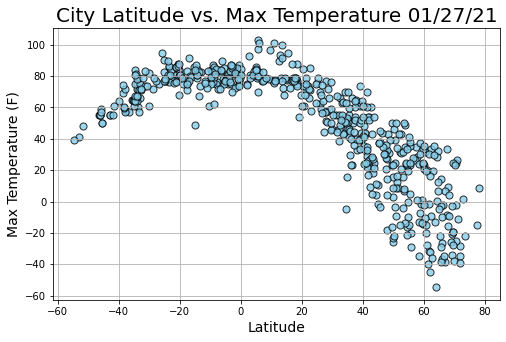

In [46]:
city_weather_df.plot.scatter(x='Lat',y='Max Temp',
                            figsize=(8,5),color='skyblue',
                            edgecolor='black',s=50,
                            alpha=0.8, linewidths=1,
                            marker='o')
plt.ylabel('Max Temperature (F)',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}", fontsize=20)
plt.grid()
plt.savefig('weather_data/latVmaxtemp.png',facecolor='white')
plt.show()

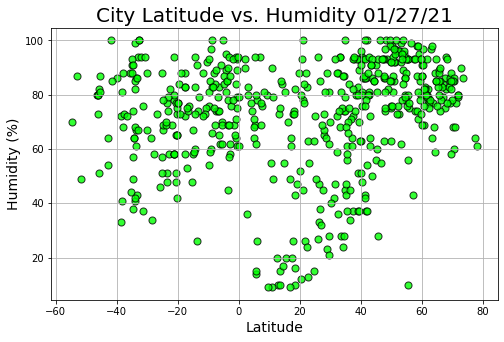

In [45]:
city_weather_df.plot.scatter('Lat','Humidity',
                            figsize=(8,5),color='lime',
                            edgecolor='black',s=50,
                            alpha = 0.8, linewidths=1,
                            marker = 'o')
plt.ylabel('Humidity (%)',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}", fontsize=20)
plt.grid()
plt.savefig('weather_data/latVhumidity.png', facecolor='white')
plt.show()

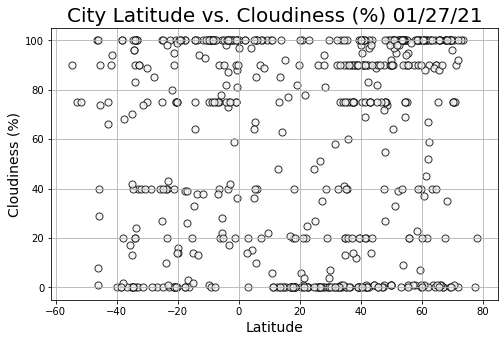

In [44]:
city_weather_df.plot.scatter('Lat','Cloudiness',
                            figsize=(8,5),color='whitesmoke',
                            edgecolor='black',s=50,
                            alpha = 0.8, linewidths=1,
                            marker = 'o')
plt.ylabel('Cloudiness (%)',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
plt.title(f"City Latitude vs. Cloudiness (%) {time.strftime('%x')}", fontsize=20)
plt.grid()
plt.savefig('weather_data/latVcloudiness.png', facecolor='white')
plt.show()

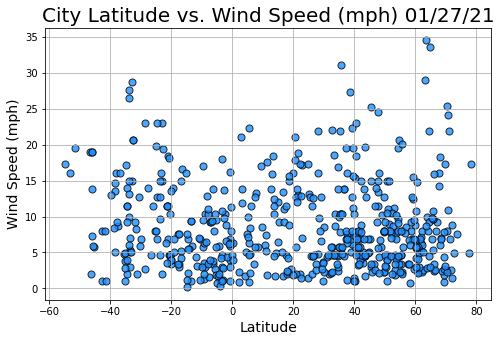

In [43]:
city_weather_df.plot.scatter('Lat','Wind Speed',
                            figsize=(8,5),color='dodgerblue',
                            edgecolor='black',s=50,
                            alpha = 0.8, linewidths=1,
                            marker = 'o')
plt.ylabel('Wind Speed (mph)',fontsize=14)
plt.xlabel('Latitude',fontsize=14)
plt.title(f"City Latitude vs. Wind Speed (mph) {time.strftime('%x')}", fontsize=20)
plt.grid()
plt.savefig('weather_data/latVwind.png', facecolor='white')
plt.show()